### Problem Statement :
	
	A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years. 


### Project Objective :

	The objective of this project is to find out patterns and insight from the data provided that can help different stores to improve in various fields, and to build predictive model to predict sales for given number of months.


### Data Description :

	We have been provided with a csv file with 6435 rows and 8 features/columns. The features provided in the data are as follows.

* `Store` : This column has the different store numbers stored which can be used to identify different stores.
* `Date` : Date of the Week on which the data was recorded
* `Weekly_Sales` : A cumulative figure of sales in dollar of a particular week.
* `Holiday_Flag` : This column describes if the given week was a holiday week or not.
* `Temperature` : Average temperature of the city in the week.
* `Fuel_Price` : Average Fuel price in the week.
* `CPI` : The Consumer Price Index measures the overall change in consumer prices based on a representative basket of goods and services over time.
* `Unemployment` : This is the sum of the unemployed who are willing to work and are actively looking for a job and the unemployed who are willing to work and are not actively looking for a job. 


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Walmart.csv')
data.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

`Statistics of all the numeric columns in the row only the column weekly_sales columns values are very large as compared to the other column values `

In [19]:
print('Range of the Weekly_Sales Column')
int(data.Weekly_Sales.max()) - int(data.Weekly_Sales.min())

Range of the Weekly_Sales Column


3608700

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


`There are no null values present in the DataFrame Date is in object format which we will convert in dateformat`

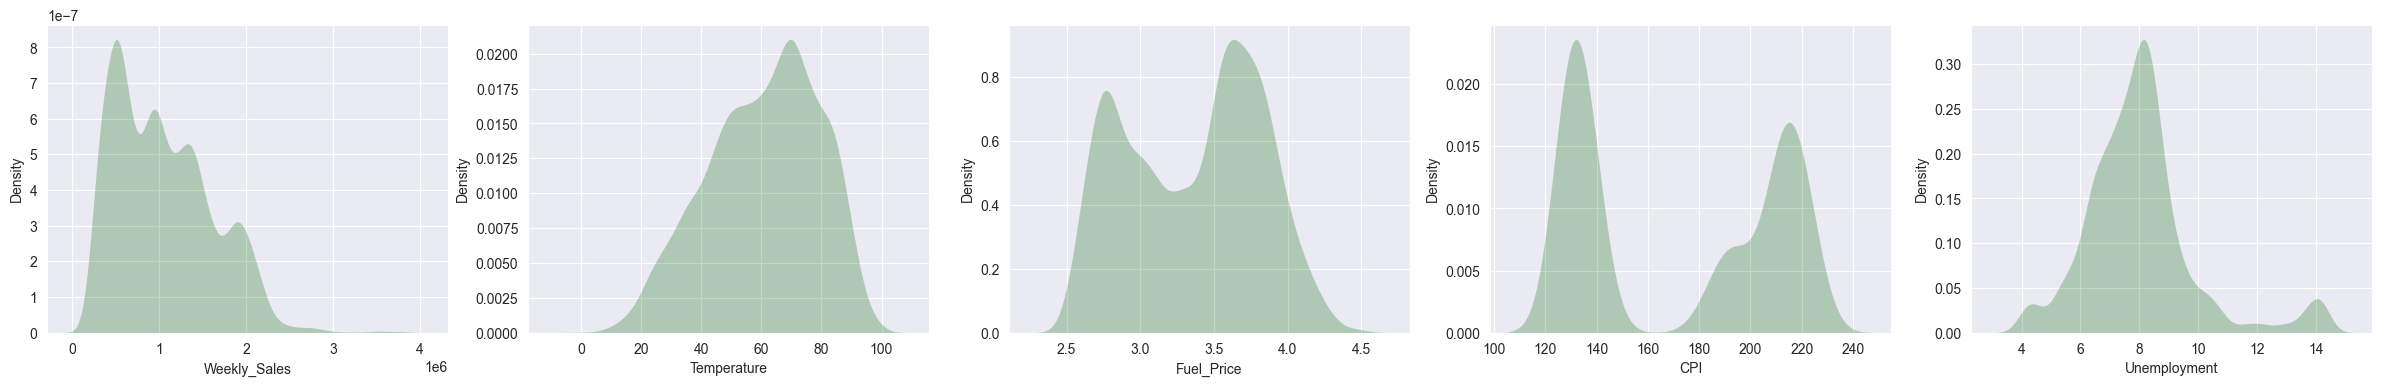

In [45]:
column = data.columns
column = column.delete(0)
column = column.delete(0)
column = column.delete(1)
sns.set_style('darkgrid')
plt.subplots(1,5,figsize = (30,4))
for index,col in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.kdeplot(data[col],fill=True,linewidth = 0,color = 'darkgreen')

`There are outliers in Temperature and Unemployment columns rest of the columns do not have any outliers present in them We can see this clearly in the box plot there are multiple ways of dealing with the outliers depending on the further exploration we will decide on that`

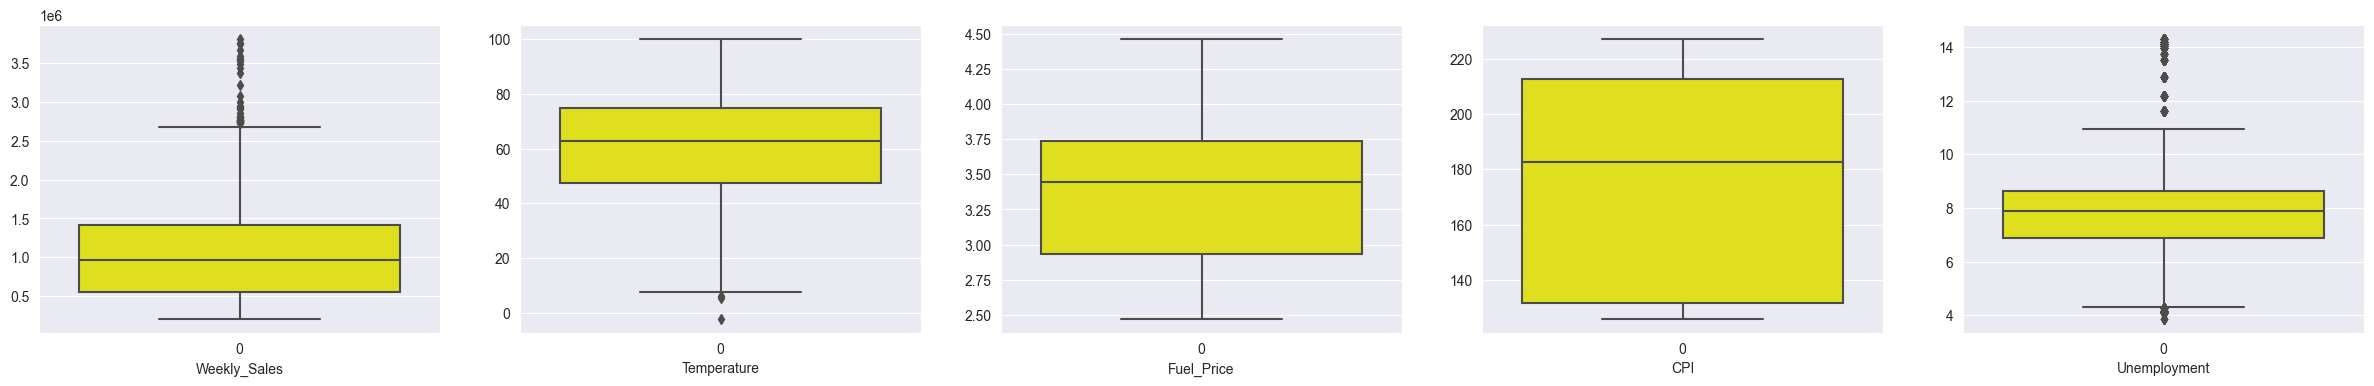

In [47]:
plt.subplots(1,5,figsize = (30,4))
for index,cols in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.boxplot(data[cols],color='yellow')
    plt.xlabel(cols)

Text(0.5, 1.0, 'Non Holiday Sales')

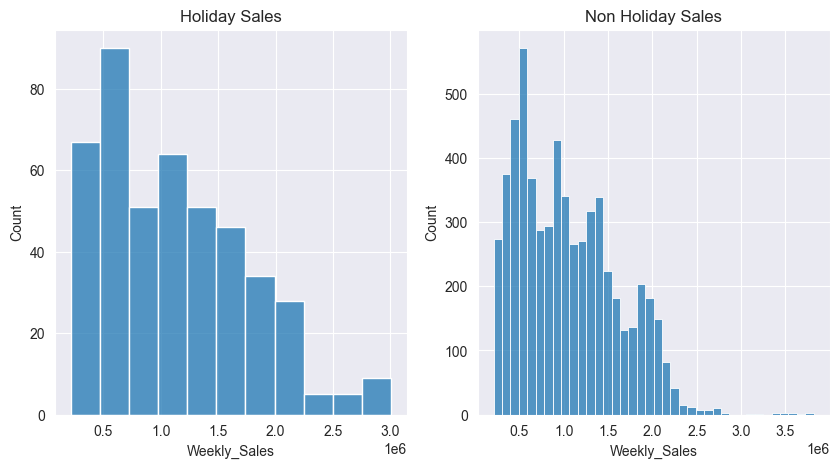

In [48]:
holiday_sales = data.loc[(data.Holiday_Flag == 1)]['Weekly_Sales']
non_holiday_sales = data.loc[(data.Holiday_Flag == 0)]['Weekly_Sales']

plt.subplots(1,2,figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(holiday_sales)
plt.title('Holiday Sales')
plt.subplot(1,2,2)
sns.histplot(non_holiday_sales)
plt.title('Non Holiday Sales')

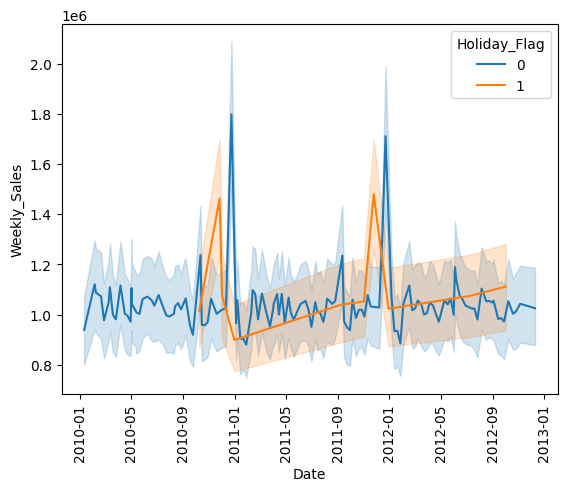

In [ ]:
data['Date'] = data['Date'].astype('datetime64[ns]')
sns.lineplot(x = data['Date'],y = data['Weekly_Sales'],hue = data['Holiday_Flag'])
plt.xticks(rotation = 90)
plt.show()

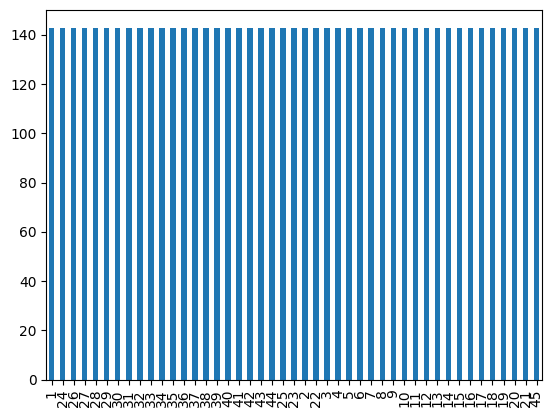

In [ ]:
data.Store.value_counts().plot(kind = 'bar')
plt.show()

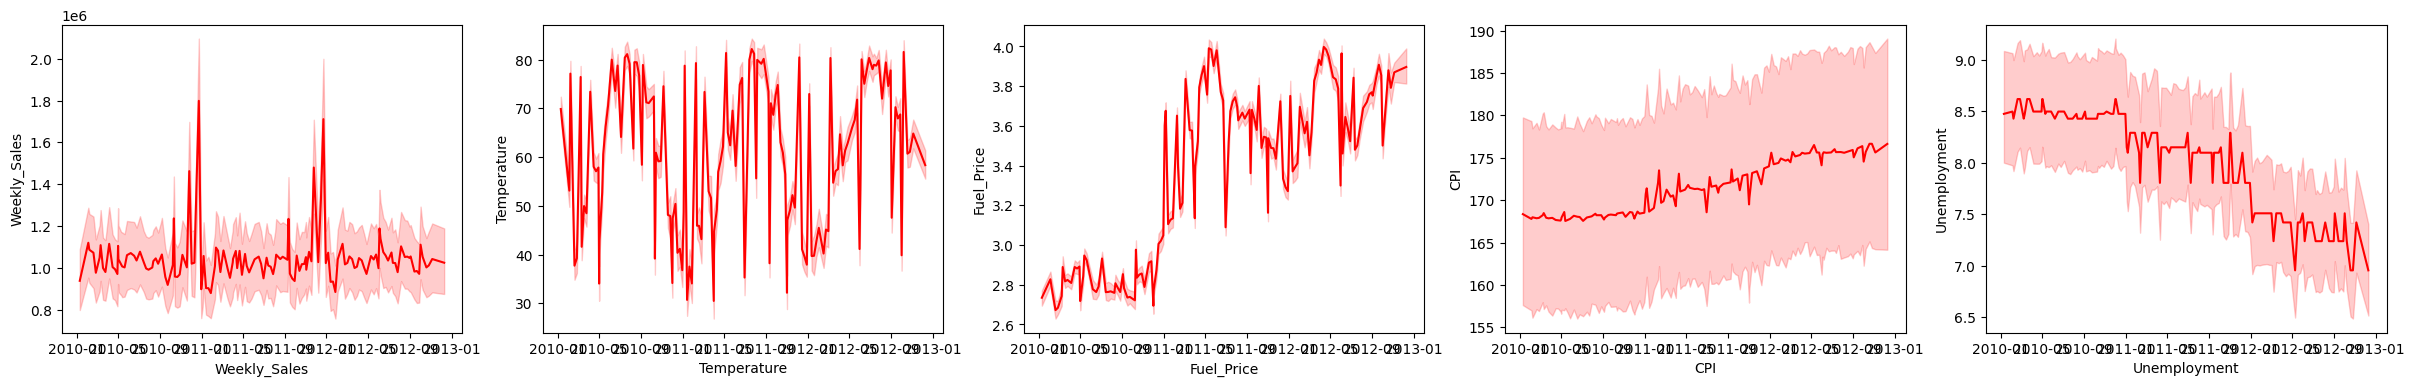

In [ ]:
plt.subplots(1,5,figsize = (30,4))
for index,cols in enumerate(column):
    plt.subplot(1,5,index+1)
    sns.lineplot(y = data[cols],x=data['Date'],color='red')
    plt.xlabel(cols)

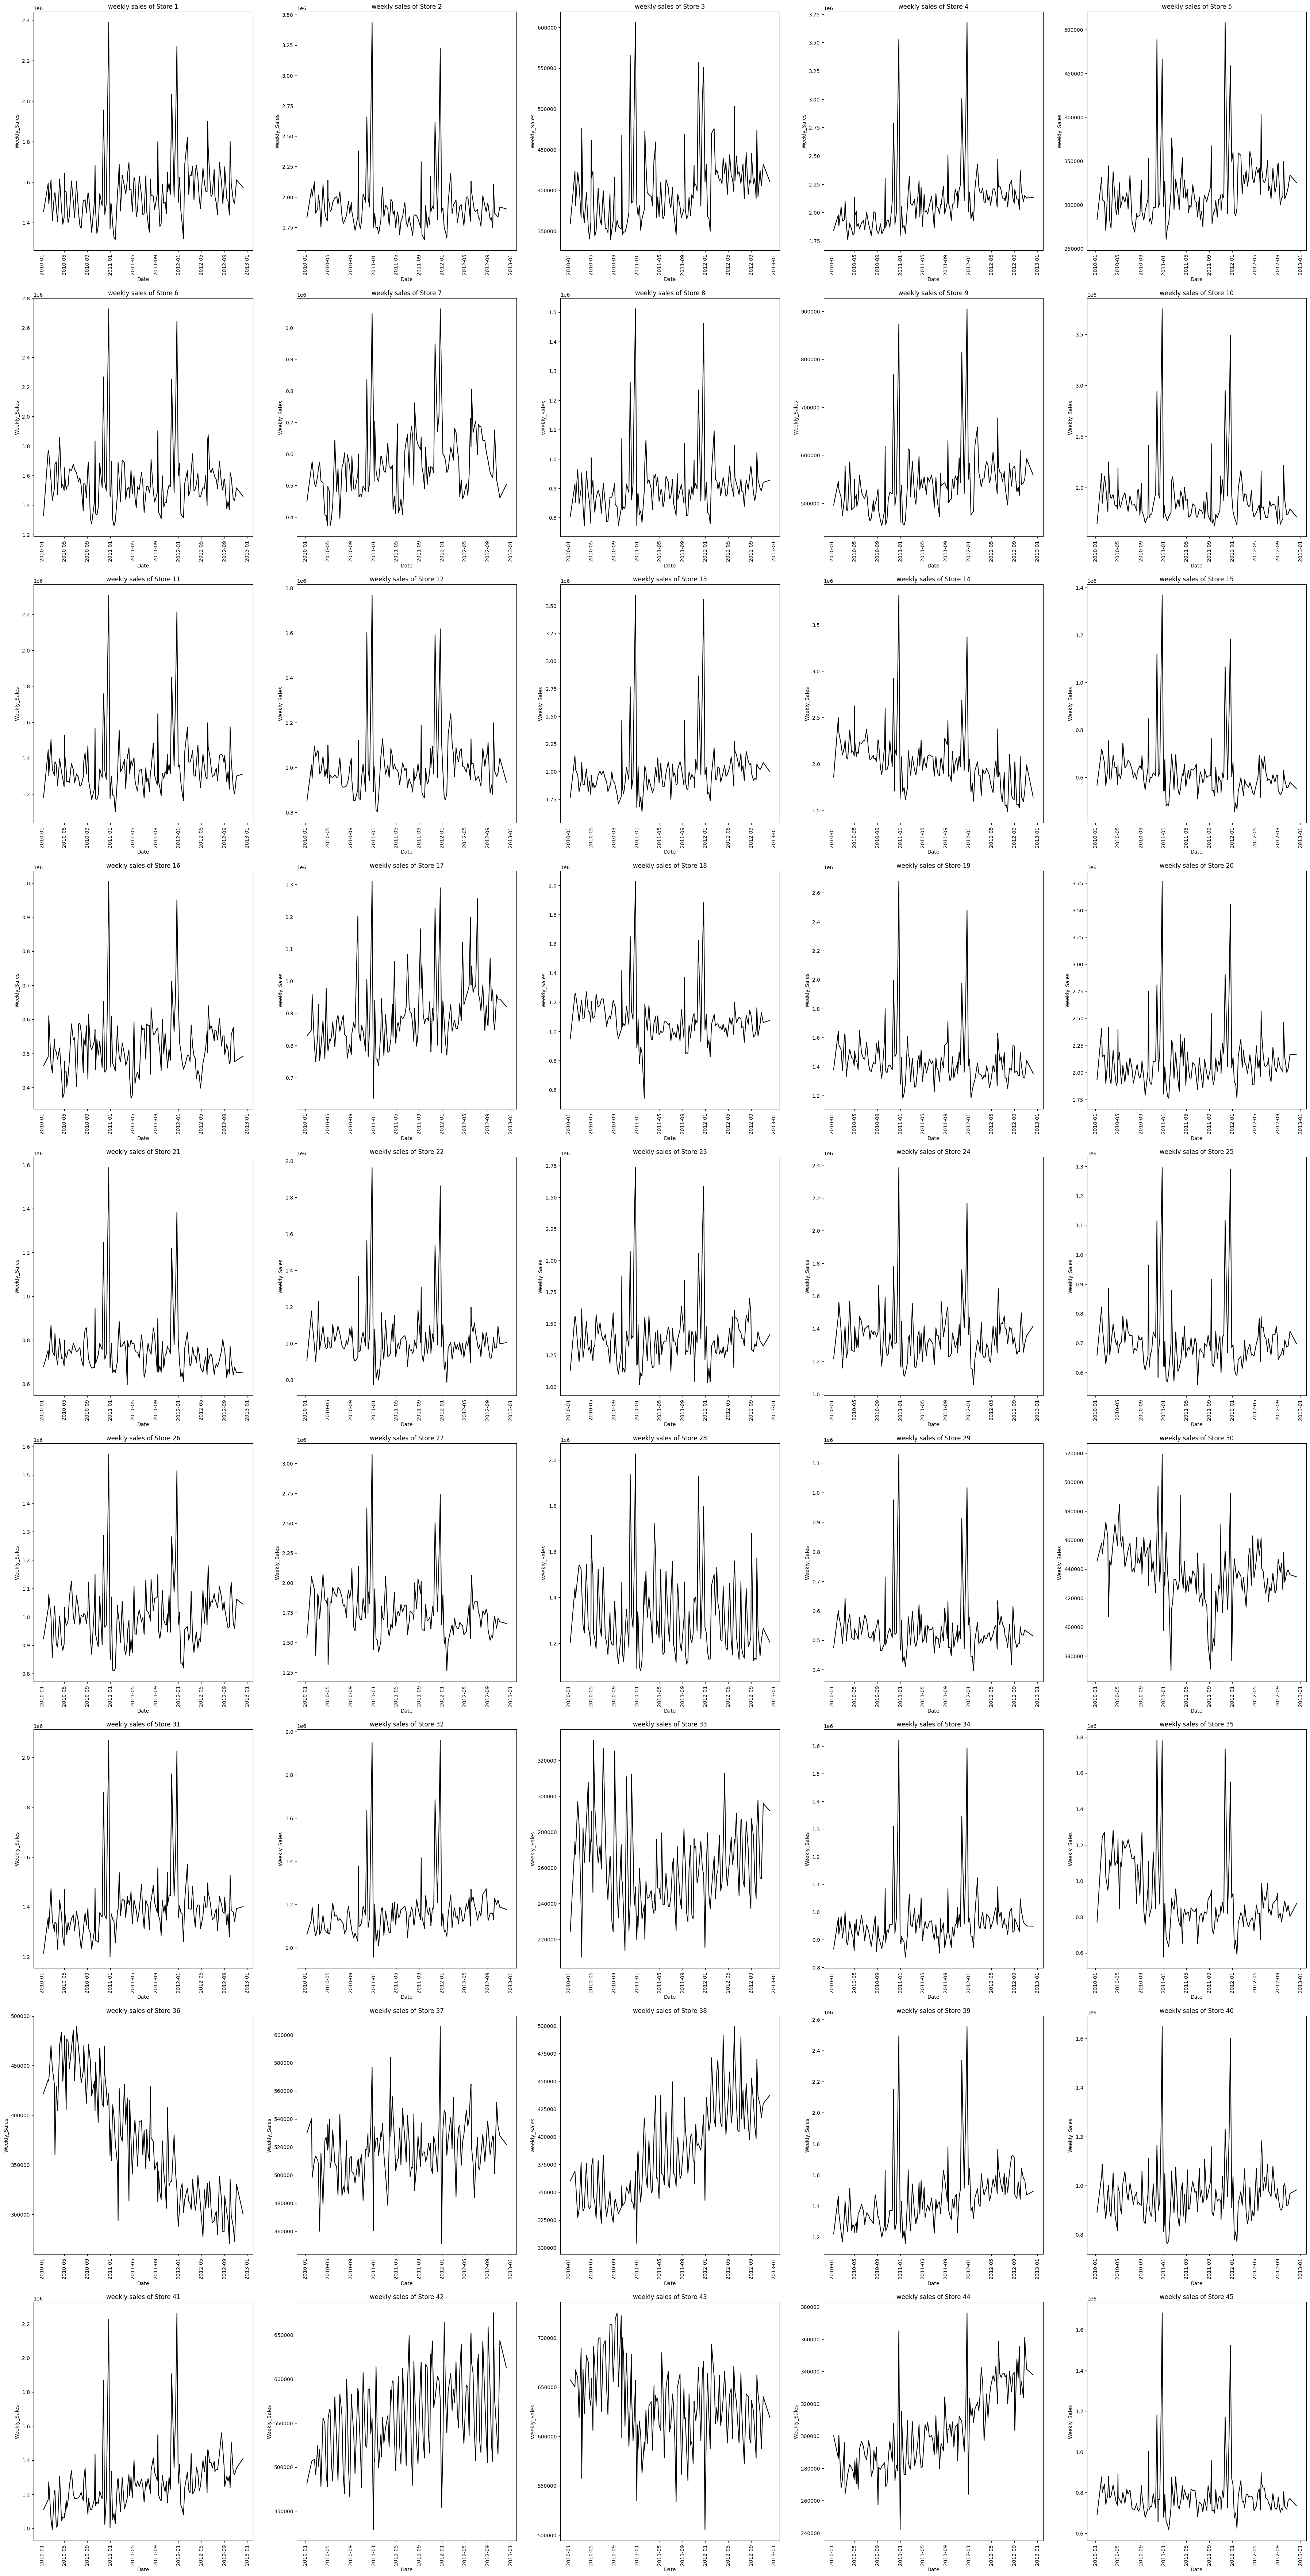

In [ ]:
plt.subplots(9,5,figsize = (45,90))
for store in range(1,46):
    plt.subplot(9,5,store)
    sns.lineplot(x = data.loc[data.Store == store]['Date'],y = data.loc[data.Store == store]['Weekly_Sales'],color = 'black')
    plt.xticks(rotation = 90)
    plt.title(f'weekly sales of Store {store}')

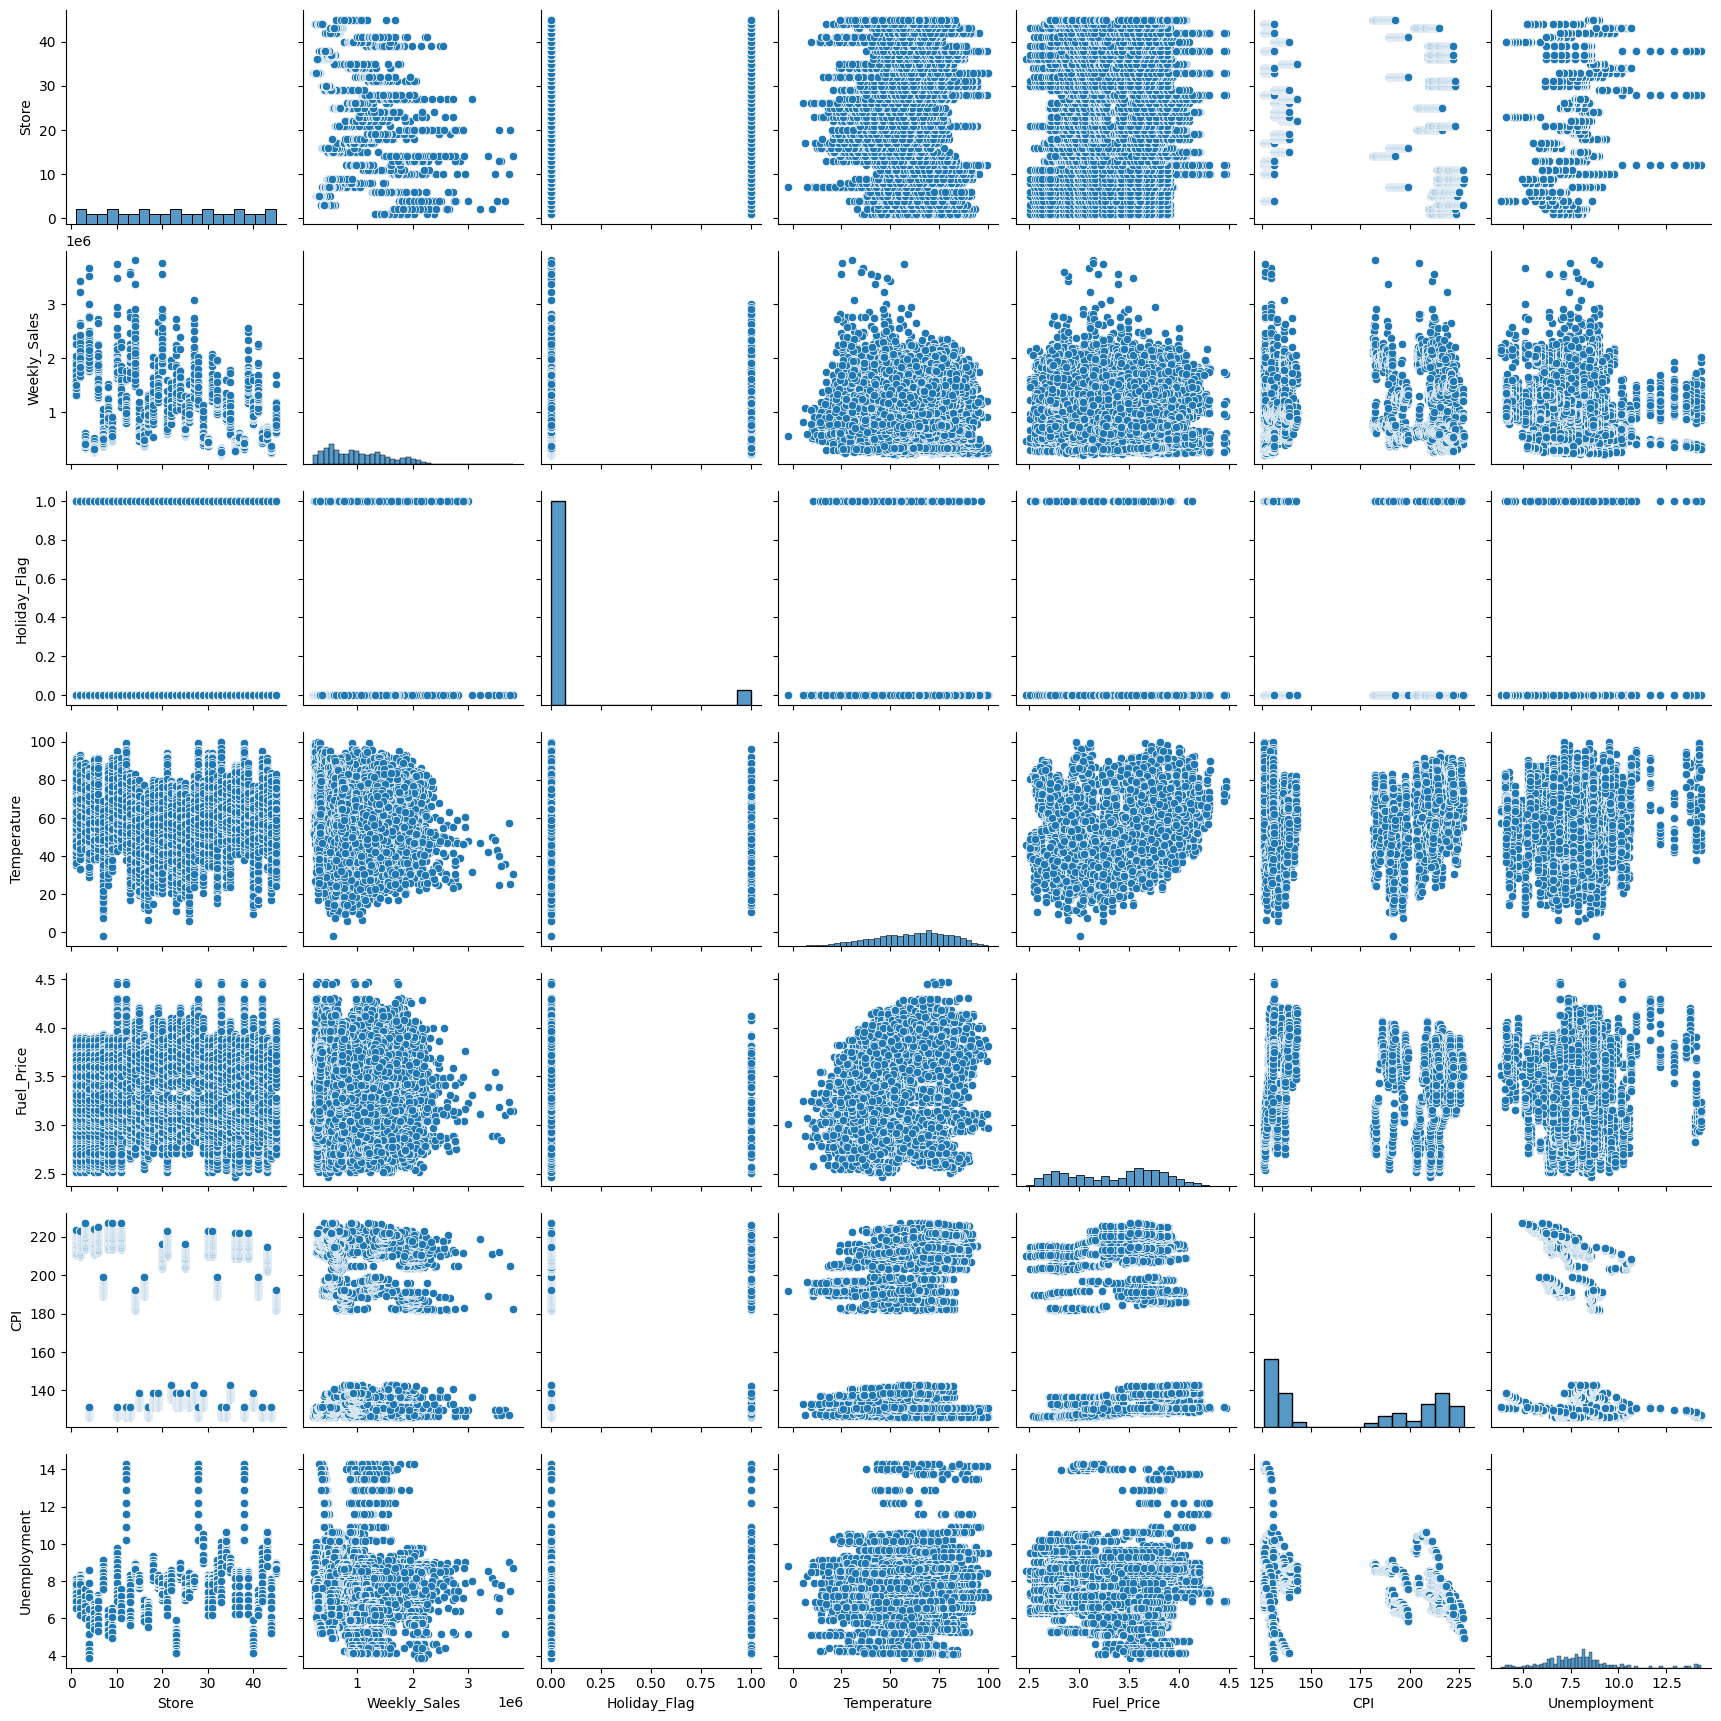

In [ ]:
sns.pairplot(data)

<AxesSubplot: >

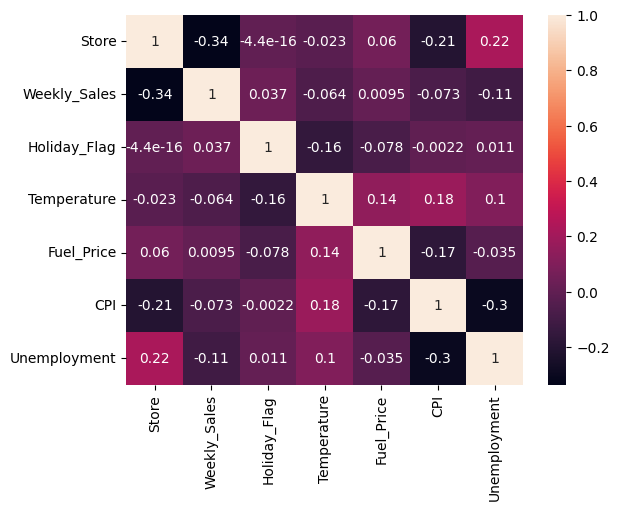

In [ ]:
sns.heatmap(data.corr(numeric_only=True),annot = True)